In [1]:
import sys
from re import split
sys.path.append('../../../')
import os
import pandas as pd
import glob
import numpy as np
from impedance.circuits import Randles, CustomCircuit
import matplotlib.pyplot as plt
from impedance.plotting import plot_nyquist
from impedance import preprocessing

In [2]:
def FitCirc_Plot(circ, inits, frequencies, Z_data, **kwargs):
    """ Function for fitting and plotting fit results of a defined circuit

    Parameters
    ----------
    circ : string
        string defining the equivalent circuit to be fit

    inits : list of floats
        initial guesses for the fir parameters

    frequencies : numpy array
        Frequencies

    Z_data : numpy array of dtype 'complex128'
        Impedance data to be fit

    Returns
    -------

    Notes
    -----
    Prints fitting results and displays figure of impedance data with fit
    and an inset of high frequency data of length specified by kwarg 'inset_len'
    with default value 30. Optionally saves "Main" Figure and "Inset" Figure 
    if save_figs is True and fig_name is not empty.

    """
    circuit = CustomCircuit(initial_guess = inits, circuit = circ)
    circuit.fit(frequencies, Z_data)
    print(circuit)

    pred_freq = np.logspace(np.log10(frequencies[0]), np.log10(frequencies[-1]), num = freqs.size)
    custom_fit = circuit.predict(pred_freq)

    fig1 = plt.figure(figsize = main_figsize)
    ax0 = fig1.add_subplot(211)
    plot_nyquist(ax0, freqs, Z, fmt='s')
    plot_nyquist(ax0, pred_freq,custom_fit, fmt='-')
    ax0.legend(['Data', 'Custom Circuit'])

    if 'inset_len' in kwargs:
        inset_len = kwargs['inset_len']
        try:
            inset_len *= 1
        except TypeError:
            print('inset_len is not an integer value.')

        inset_len = int(inset_len)
    else:
        inset_len = 30

    fig2 = plt.figure(figsize = inset_figsize)
    ax1 = fig2.add_subplot(212)
    plot_nyquist(ax1, freqs[:inset_len], Z[:inset_len], fmt = 's')
    plot_nyquist(ax1, pred_freq[:inset_len], custom_fit[:inset_len], fmt = '-')

    if 'save_figs' in kwargs and kwargs['save_figs']==True:
        if 'fig_name' not in kwargs:
            print('No file name for t')
        else:
            fig1.savefig(kwargs['fig_name'] + ' Main.png',dpi=300,bbox_inches='tight')
            fig2.savefig(kwargs['fig_name'] + ' Inset.png',dpi=300,bbox_inches='tight')
            
def calcS(Y):
    a = np.diff(Y)
    b = np.diff(np.conj(Y))
    return np.sum(a*b)

def calcw(frequencies):
    w = 2 * np.pi * frequencies
    return w

def calcLY(Z, C,  frequencies):
    w = calcw(frequencies)
    Yel = 1/Z
    S = np.zeros(np.size(C), dtype = complex)
    
    try:
        C.dtype
        print('Yes array')
        for i in range(np.size(C)):
            S[i] = calcS(Yel - 1j * w * C[i])
    except:
        print('No array')
        S = calcS(Yel - 1j * w * C)

    return np.sqrt(S)

def par_cap_subtract(Z, frequencies, C_s):
    Yel = 1/Z
    Y_corr = Yel - 1j * calcw(frequencies) * C_s
    return 1/Y_corr

In [5]:
direc = r'\Data'
print(os.getcwd())
all_files=glob.glob(os.getcwd() + direc + '\*.par')
all_files.sort()

f_name=all_files[1]
print(f_name)
freqs, Z= preprocessing.readVersaStudio(f_name)

C:\Users\shadd\OneDrive\Documents\Python\EIS
C:\Users\shadd\OneDrive\Documents\Python\EIS\Data\Nov 19 frXAS\OCV_EIS_Before1.z


In [6]:
# Some initial guess values for all circuits
d=266e-9 #thickness of Al2O3 mask
A=3e-3*3e-3-(6*1e-3*4e-6) #Area of mask minus area of electrode gates

R_elyte=32.8

C_if=1.4e-6
R_if=15

C_mask=9.7*8.854e-12*8.976e-6/266e-9 #permitivity=9.7 thickness=266 nm
R_mask=3.54e5*d/A
R_chem=1600
C_chem=2.23e-4

min_ind=np.argmin(np.imag(Z[:]))
tg_init=freqs[min_ind]
Rg_init=1600

main_figsize=(10,7.5)
inset_figsize=(6,6)

In [17]:
LY1=calcLY(Z,1e-5,f)

No array


C:\Users\shadd\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\shadd\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide


In [18]:
frequencies = f 
C= 1e-5

w = calcw(frequencies)
Yel = 1/Z
S = np.zeros(np.size(C), dtype = complex)

try:
    C.dtype
    print('Yes array')
    for i in range(np.size(C)):
        S[i] = calcS(Yel - 1j * w * C[i])
except:
    print('No array')
    S = calcS(Yel - 1j * w * C)
    
LY=np.sqrt(S)

No array


C:\Users\shadd\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\shadd\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [21]:
LY1=calcLY(Z[1:],C_guess,f[1:])

Yes array


Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters
Simulating circuit based on initial parameters


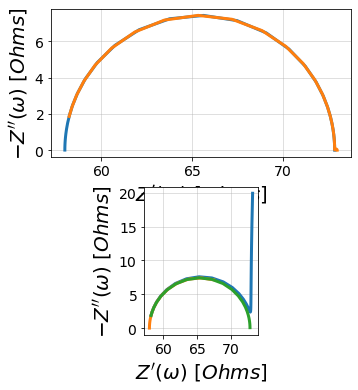

In [29]:
circuita=CustomCircuit(initial_guess=[R_elyte,R_if,C_if,R_chem,C_chem],circuit='R0-p(R1,C1)-p(R2,C2)')
Pred_a=circuita.predict(pred_freq,use_initial=True)

circuitb=CustomCircuit(initial_guess=[R_elyte,C_if,R_if,R_chem,C_chem],circuit='R0-p(C1,R1,p(R2,C2))')
Pred_b=circuitb.predict(pred_freq,use_initial=True)

circuitc=CustomCircuit(initial_guess=[R_elyte,C_if,R_if,R_chem,C_chem],circuit='R0-p(C1,R1,R2-C2)')
Pred_c=circuitc.predict(pred_freq,use_initial=True)

circuitd=CustomCircuit(initial_guess=[R_elyte,C_if,R_if,R_chem,C_chem],circuit='R0-p(C1,R1,p(R2,C2))')
Pred_s=circuitd.predict(pred_freq,use_initial=True)

fig=plt.figure(figsize=(6,6))
ax0=fig.add_subplot(211)
# plot_nyquist(ax0, pred_freq,Pred_a,fmt='-')
plot_nyquist(ax0, pred_freq,Pred_b,fmt='-')
plot_nyquist(ax0, pred_freq,Pred_c,fmt='-')

ax1=fig.add_subplot(212)

plot_nyquist(ax1, pred_freq,Pred_a[:30],fmt='-')
plot_nyquist(ax1, pred_freq,Pred_b[:30],fmt='-')
plot_nyquist(ax1, pred_freq,Pred_c[:30],fmt='-')


Circuit string: p(C2,p(R1,C1)-G1)
Fit: True

Initial guesses:
     C2 = 2.90e-09 [F]
     R1 = 1.50e+01 [Ohm]
     C1 = 1.40e-06 [F]
   G1_0 = 2.35e+03 [Ohm^-1 sec^1/2]
   G1_1 = 2.15e+00 [sec^-1]

Fit parameters:
     C2 = 1.66e-05  (+/- 3.89e-06) [F]
     R1 = 7.63e+00  (+/- 2.67e+01) [Ohm]
     C1 = 6.15e-03  (+/- 2.34e-02) [F]
   G1_0 = 1.61e+03  (+/- 5.47e+01) [Ohm^-1 sec^1/2]
   G1_1 = 1.29e+00  (+/- 5.11e-02) [sec^-1]



C:\Users\Modeling\Miniconda3\envs\impedance-analysis\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Modeling\Miniconda3\envs\impedance-analysis\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Modeling\Miniconda3\envs\impedance-analysis\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Modeling\Miniconda3\envs\impedance-analysis\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


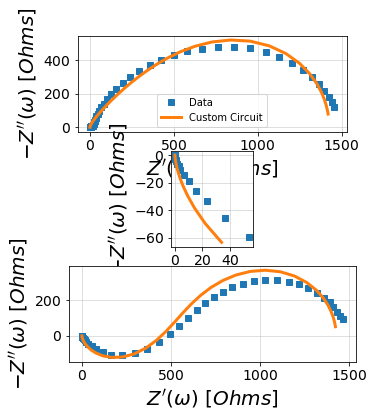

In [57]:
Z_corr=Z-Z[0]
inits=[C_mask,R_if,C_if,Y_init,K_init]
circ='p(C2,p(R1,C1)-G1)'

circuit7=CustomCircuit(initial_guess=inits,circuit=circ)
circuit7.fit(freqs,Z_corr)
print(circuit7)

pred_freq=np.logspace(np.log10(freqs[0]),np.log10(freqs[-1]),num=freqs.size)
custom_fit7=circuit7.predict(pred_freq)

C_Al=1e-4

fig=plt.figure(figsize=(6,6))
ax0=fig.add_subplot(311)
plot_nyquist(ax0, freqs, Z_corr,fmt='s')
plot_nyquist(ax0, pred_freq,custom_fit7,fmt='-')

ax1=fig.add_subplot(312)
plot_nyquist(ax1, freqs, 1/(1/Z_corr[:30]-(1j*2*np.pi*freqs[:30]*C_Al)),fmt='s')
plot_nyquist(ax1, pred_freq,1/(1/custom_fit7[:30]-(1j*2*np.pi*freqs[:30]*C_Al)),fmt='-')

ax2=fig.add_subplot(313)
plot_nyquist(ax2, freqs, 1/(1/Z_corr-(1j*2*np.pi*freqs*C_Al)),fmt='s')
plot_nyquist(ax2, pred_freq,1/(1/custom_fit7-(1j*2*np.pi*freqs*C_Al)),fmt='-')

ax0.legend(['Data','Custom Circuit'])

In [ ]:
#Berthier capacitance subtraction for Circuit 3. Z2=1/jwC

fig=plt.figure(figsize=(6,6))
ax0=fig.add_subplot(311)
plot_nyquist(ax0, freqs, Z_corr,fmt='s')
plot_nyquist(ax0, pred_freq,custom_fit7,fmt='-')

C_mask=3e-5
Z2=1/(1j*freqs*2*np.pi*C_mask)
Z_if=R_if/(1+1j*freqs*2*np.pi*R_if*C_if)

ax1=fig.add_subplot(312)
plot_nyquist(ax1, freqs, 1/(1/Z_corr-1/Z2),fmt='s')
plot_nyquist(ax1, pred_freq,1/(1/custom_fit7-1/Z2),fmt='-')

ax2=fig.add_subplot(313)
plot_nyquist(ax2, freqs, 1/(1/(Z_corr-Z_if)-1/Z2),fmt='s')
plot_nyquist(ax2, pred_freq,1/(1/(custom_fit7-Z_if)-1/Z2),fmt='-')

ax0.legend(['Data','Custom Circuit'])

In [ ]:
#Berthier capacitance subtraction for Circuit 5. Z2=R/(1+jwC)

fig=plt.figure(figsize=(6,6))
ax0=fig.add_subplot(311)
plot_nyquist(ax0, freqs, Z_corr,fmt='s')
plot_nyquist(ax0, pred_freq,custom_fit7,fmt='-')

C_mask=3e-5
R_mask2=R_mask*.1
Z2=R_mask/(1+1j*freqs*2*np.pi*R_mask*C_mask)
Z_if=R_if/(1+1j*freqs*2*np.pi*R_if*C_if)

ax1=fig.add_subplot(312)
plot_nyquist(ax1, freqs, 1/(1/Z_corr-1/Z2),fmt='s')
plot_nyquist(ax1, pred_freq,1/(1/custom_fit7-1/Z2),fmt='-')

ax2=fig.add_subplot(313)
plot_nyquist(ax2, freqs, 1/(1/(Z_corr-Z_if)-1/Z2),fmt='s')
plot_nyquist(ax2, pred_freq,1/(1/(custom_fit7-Z_if)-1/Z2),fmt='-')

ax0.legend(['Data','Custom Circuit'])

In [56]:
print(circuit3,circuit3.parameters_)


Circuit string: R0-p(C2,p(R1,C1)-G1)
Fit: True

Initial guesses:
     R0 = 5.80e+01 [Ohm]
     C2 = 2.90e-09 [F]
     R1 = 1.50e+01 [Ohm]
     C1 = 1.40e-06 [F]
   G1_0 = 2.35e+03 [Ohm^-1 sec^1/2]
   G1_1 = 2.15e+00 [sec^-1]

Fit parameters:
     R0 = 6.43e+01  (+/- 4.56e+00) [Ohm]
     C2 = 1.93e-05  (+/- 4.51e-05) [F]
     R1 = 3.90e-11  (+/- 1.30e+02) [Ohm]
     C1 = 4.93e+01  (+/- 4.98e-14) [F]
   G1_0 = 1.63e+03  (+/- 7.57e+01) [Ohm^-1 sec^1/2]
   G1_1 = 1.31e+00  (+/- 1.30e-01) [sec^-1]
 [6.42613899e+01 1.92508133e-05 3.90276094e-11 4.92556633e+01
 1.62616278e+03 1.31297652e+00]


In [ ]:
# def plot_nyquist(ax, freq, Z, scale=1, units='Ohms', fmt='.-'):
#     """ Convenience function for plotting nyquist plots


#         Parameters
#         ----------
#         ax: matplotlib.axes.Axes
#             axes on which to plot the nyquist plot
#         freq: np.array of floats
#             frequencies
#         Z: np.array of complex numbers
#             impedance data
#         scale: float
#             the scale for the axes
#         units: string
#             units for :math:`Z(\\omega)`
#         fmt: string
#             format string passed to matplotlib (e.g. '.-' or 'o')

#         Returns
#         -------
#         ax: matplotlib.axes.Axes
#     """

#     ax.plot(np.real(Z), -np.imag(Z), fmt, lw=3)

#     # Make the axes square
#     ax.set_aspect('equal')

#     # Set the labels to -imaginary vs real
#     ax.set_xlabel(r'$Z^{\prime}(\omega)$ ' +
#                   '$[{}]$'.format(units), fontsize=20)
#     ax.set_ylabel(r'$-Z^{\prime\prime}(\omega)$ ' +
#                   '$[{}]$'.format(units), fontsize=20)

#     # Make the tick labels larger
#     ax.tick_params(axis='both', which='major', labelsize=14)

#     # Change the number of labels on each axis to five
#     ax.locator_params(axis='x', nbins=5, tight=True)
#     ax.locator_params(axis='y', nbins=5, tight=True)

#     # Add a light grid
#     ax.grid(b=True, which='major', axis='both', alpha=.5)

#     # Change axis units to 10**log10(scale) and resize the offset text
#     ax.xaxis.set_major_formatter(FixedOrderFormatter(-np.log10(scale)))
#     ax.yaxis.set_major_formatter(FixedOrderFormatter(-np.log10(scale)))
#     y_offset = ax.yaxis.get_offset_text()
#     y_offset.set_size(18)
#     t = ax.xaxis.get_offset_text()
#     t.set_size(18)

#     return ax

In [232]:
def plot_bode(fig, freq, Z, scale=1, units='Ohms', fmt='.-'):
    """ Convenience function for plotting Bode plots


        Parameters
        ----------
        ax: matplotlib.axes.Axes
            axes on which to plot the nyquist plot
        freq: np.array of floats
            frequencies
        Z: np.array of complex numbers
            impedance data
        scale: float
            the scale for the axes
        units: string
            units for :math:`Z(\\omega)`
        fmt: string
            format string passed to matplotlib (e.g. '.-' or 'o')

        Returns
        -------
        ax: matplotlib.axes.Axes
    """
    ax = fig.add_subplot(211)
    ax.plot(np.log10(freq), np.abs(Z), fmt, lw=3)

    ax.set_xlabel(r'$log_{10} \ f \ $ ' +
                  '$[{}]$'.format('Hz'), fontsize=20)
    ax.set_ylabel(r'$|Z|(\omega)$ ' +
                  '$[{}]$'.format(units), fontsize=20)

    ax = fig.add_subplot(212)
    ax.plot(np.log10(freq), np.angle(Z), fmt, lw=3)

    ax.set_xlabel(r'$log_{10} \ f \ $ ' +
                  '$[{}]$'.format('Hz'), fontsize=20)
    ax.set_ylabel(r'$\phi_Z \ $ ' +
                  '$[{^{\circ}}]$', fontsize=20)

    plt.show()

    return ax

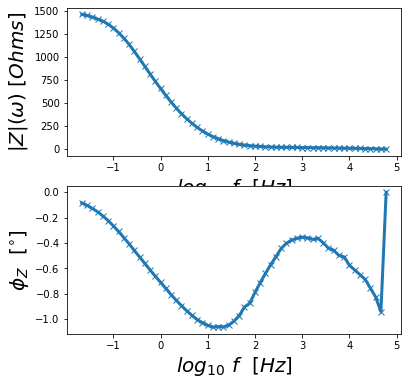

In [230]:
fig = plt.figure(figsize=(6,6))

ax0 = fig.add_subplot(211)
ax0.plot(np.log10(freq), np.abs(Z), fmt, lw=3)

ax0.set_xlabel(r'$log_{10} \ f \ $ ' +
              '$[{}]$'.format('Hz'), fontsize=20)
ax0.set_ylabel(r'$|Z|(\omega)$ ' +
              '$[{}]$'.format(units), fontsize=20)

ax0 = fig.add_subplot(212)
ax0.plot(np.log10(freq), np.angle(Z), fmt, lw=3)

ax0.set_xlabel(r'$log_{10} \ f \ $ ' +
              '$[{}]$'.format('Hz'), fontsize=20)
ax0.set_ylabel(r'$\phi_Z \ $ ' +
              '$[{^{\circ}}]$', fontsize=20)

plt.show()

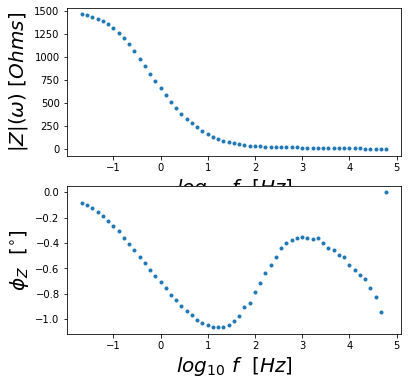

In [234]:
fig=plt.figure(figsize = (6,6))

plot_bode(fig, f, Z ,fmt='.')

In [20]:
## Stuff contributed for drawing out circuits
## Seems like there's some significant problems with this code
def draw_parallel(d, c, eprev):
    """ Function to draw parallel elements of a circuit
    
    Parameters
    ----------
    d:
    
    c:
    
    eprev:
    
    Returns
    -------
    d:
    """
    m = re.search('p\((.+),(.+)\)', c)
    e1, e2 = m[1], m[2]

    h = 1.5
    emap = {'R': e.RES, 'C': e.CAP, 'W': WARBURG}

    if eprev == 'Parallel':
        d.add(e.LINE, d='right', l=h)
    d.add(e.DOT)
    d.push()
    d.add(e.LINE, d='up', l=h)
    d.add(emap[e1[0]], label='$'+e1+'$', d='right')
    d.add(e.LINE, d='down', l=h)
    d.add(e.DOT)
    d.pop()
    d.add(e.LINE, d='down', l=h)
    d.add(emap[e2[0]], label='$'+e2+'$', d='right')
    d.add(e.LINE, d='up', l=h)
    d.add(e.DOT)

    return d

def draw_circuit(circuit):
    """ Constructs an SchemDraw drawing of a circuit that is specified as
    a string.
    
    Parameters
    ----------
    circuit: string
        String representation of equivalent circuit
    """

    import SchemDraw as schem
    import SchemDraw.elements as e
    import re

    clist = circuit.split('-')

    # define Warburg circuit element
    wpath = np.array(
        [[-0.25, 0.5], [0, -0.5], [0.25, 0.25], [0.5, -0.5], [0.75, 0.5]])

    WARBURG = {
        'name': 'WARBURG',
        'paths': [0.8*wpath, [[0, 0], [0.5, 0]]],
    }

    # map circuit elements to drawing fucntions
    emap = {'R': e.RES, 'C': e.CAP, 'L': e.INDUCTOR, 'W': WARBURG}

    # initialize drawing
    dwg = schem.Drawing()

   

    # main loop
    for c in clist:

        if c[0] is not 'p':
            dwg.add(emap[c[0]], label='$'+c+'$', d='right')
            eprev = 'Serial'
        else:
            dwg = draw_parallel(dwg, c, eprev)
            eprev = 'Parallel'

    # create image
    dwg.draw()

    return dwg 

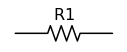

In [19]:
import SchemDraw as schem
import SchemDraw.elements as e
import re

wpath = np.array(
        [[-0.25, 0.5], [0, -0.5], [0.25, 0.25], [0.5, -0.5], [0.75, 0.5]])

WARBURG = {
    'name': 'WARBURG',
    'paths': [0.8*wpath, [[0, 0], [0.5, 0]]],
}

# map circuit elements to drawing fucntions
emap = {'R': e.RES, 'C': e.CAP, 'L': e.INDUCTOR, 'W': WARBURG}

# initialize drawing
dwg = schem.Drawing()

dwg.add(emap['R'], label = '$R1$', d='right')

dwg.draw()

In [63]:
np.max(np.imag(Z))

4.575431